# Bitcoin as "Digital Gold"? A Visual Analysis of Its Role as a Hedge Against Inflation and Market Volatility

As inflation creates general unease within our economy, we're seeing a rise in investments into alternative commodities and assets that are said to "hedge"—an investment that's expected to hold or increase its value over time, even as the cost of everything else goes up. One of these assets is Bitcoin ($BTC), a cryptocurrency often dubbed "Digital Gold" based on popular sentiment. 

As governments printed significant amounts of money, especially in recent years, many investors have looked for assets that can protect their wealth from the resulting inflation. Proponents claim Bitcoin, with its fixed supply, is a perfect candidate. A good hedge should ideally be stable, but what if Bitcoin becomes more chaotic and unpredictable precisely when you need it to be a safe haven? This project explores and investigates this popular claim by asking the question:

- **Does Bitcoin's volatility change during periods of high vs. low inflation?**
- **During major stock market crashes, does Bitcoin act as a 'safe haven' by holding its value, or does it crash even harder?**
- **How does Bitcoin’s performance change during spikes in market-wide fear and uncertainty, and does it behave more like gold (a hedge) or the S&P 500 (a risk asset)?**
- **Does Bitcoin behave like a hedge or a risk asset when U.S. interest rates (DFF) rise or fall, and how does its response compare to gold and the S&P 500?**

## Mining Metrics: Sourcing Our Datasets
Several key financial and economic datasets are needed to investigate the relationship between Bitcoin, inflation, and broader market behavior. The following data was sourced from Yahoo Finance (via the `yfinance` library) and the Federal Reserve Economic Data (FRED) database.

**1. Bitcoin (BTC-USD)**
> This dataset contains the daily price history of Bitcoin valued in U.S. Dollars, which is central to evaluating its performance as an asset.

- **Source:** Yahoo Finance (`yfinance` Ticker: BTC-USD)
- **Link:** https://finance.yahoo.com/quote/BTC-USD/
- **Features**:
    - **Date:** The trading day
    - **Open/High/Low/Close:** The opening, highest, lowest, and closing prices for the day.
    - **Volume:** The total number of Bitcoins traded.

**2. S&P 500 Index (^GSPC)**
> This data tracks the performance of 500 of the largest publicly-traded companies in the United States, offering a snapshot of the overall health of the U.S. stock market. This is essential for analyzing how Bitcoin behaves during broad market movements and crashes.

- **Source:** Yahoo Finance (`yfinance` Ticker: ^GSPC)
- **Link:** https://finance.yahoo.com/quote/GSPC/
- **Features:** Includes the same trading day, OHLC (Open, High, Low, Close) and Volume data points as the Bitcoin dataset, but for the S&P 500 index.

**3. CBOE Volatility Index (^VIX)**
> Also known as a "fear index," the VIX measures expected market volatility by tracking option prices (contracts that let investors bet on or protect against future price moves) on the S&P 500. It is crucial for understanding how Bitcoin's own volatility and price action correlate with periods of market fear and uncertainty.

 - **Source:** Yahoo Finance (`yfinance` Ticker: ^VIX)
 - **Link:** https://finance.yahoo.com/quote/^VIX/
 - **Features:** Contains OHLC data points representing the daily values of the index.

**4. Gold Futures (GC=F)**
> This dataset tracks the price of gold, the traditional safe-haven asset. It provides a direct benchmark to compare against Bitcoin's performance as an inflation hedge and store of value.

 - **Source:** Yahoo Finance (`yfinance` Ticker: GC=F)
 - **Link:** https://finance.yahoo.com/quote/GC=F/
 - **Features:** Contains OHLC and Volume data for gold futures contracts.

**5. U.S Inflation (CPIAUCSL)**
> This is the primary measure of inflation. The dataset tracks the average change in prices paid by urban consumers for a basket of goods and services.

 - **Source:** Federal Reserve Economic Data (FRED Ticker: CPIAUCSL)
 - **Link:** https://fred.stlouisfed.org/series/CPIAUCSL
 - **Features:**
    - **Date:** The date of the observation
    - **Value:** A seasonally adjusted index value (1982-1984 = 100) representing the relative cost of goods.

**6. Effective Federal Funds Rate (DFF)**
> This dataset shows the main interest rate set by the U.S. Federal Reserve. It’s the rate that strongly influences how expensive or cheap it is to borrow money in the economy. When this rate changes, it often affects things like mortgages, credit cards, and the stock market.

 - **Source:** Federal Reserve Economic Data (FRED Ticker: DFF)
 - **Link:** https://fred.stlouisfed.org/series/DFF
 - **Features:**
    - **Date:** The date of the observation
    - **Value:** The effective federal funds rate, expressed as a percentage.

## Panning for Gold: Preprocessing the Datasets

The goal is to create a clean dataset in which all variables are aligned in time and transformed into metrics for analysis.

This involves four main preprocessing steps:


**Step 1: Loading the Datasets**

We need to load all six datasets into our Jupyter Notebook. We'll use a common date range to ensure we're looking at the same period for all assets.

We'll import the necessary Python libraries (`pandas`, `yfinance`, `pandas_datareader`, `pandas-ta`, `numpy`, `datetime`, `matplotlib`, `seaborn`) and download the time series for each of the six datasets, storing them in pandas DataFrames.
- **pandas**: Core library for data handling and manipulation. We use it to load datasets, clean them, align dates, and calculate returns.  
- **yfinance**: Allows us to pull historical market data (e.g., Bitcoin, S&P 500, Gold) directly from Yahoo Finance.  
- **pandas_datareader**: Used to fetch economic data from sources like FRED (e.g., CPI, Effective Federal Funds Rate).  
- **pandas_ta**: A library of technical analysis indicators. While not heavily used here, it’s useful for calculating moving averages, volatility, or other trading metrics if needed.  
- **numpy**: Provides fast numerical operations, which support calculations like cumulative returns, percentage changes, and other array-based computations.  
- **datetime**: Used to handle and manipulate dates. This is essential for aligning datasets on a common timeline, resampling data into weekly or monthly periods, and clearly defining event windows.
- **matplotlib**: A versatile plotting library for building visualizations. We use it for detailed control over charts, adding labels, annotations, and customizing plots.  
- **seaborn**: A visualization library built on top of Matplotlib. We use it to create clean, high-level statistical plots (boxplots, bar charts, and line graphs).  

To keep our analysis consistent across all datasets, we first resample the raw CPI data to a clean monthly frequency (`MS`). From this standardized monthly series, we are then able to calculate the year-over-year (YoY) inflation rate. This transformation allows us to directly compare inflation trends with the financial assets (Bitcoin, S&P 500, and Gold) on the same timeline, ensuring that our results reflect meaningful economic shifts.

In [1]:
%pip install pandas yfinance pandas_datareader pandas-ta numpy datetime matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries to install:
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import pandas_ta as ta
import datetime


# Define tickers and Date Range. The start and end dates are set to cover from a long period ago to the present day.
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime.now()
yf_tickers = ['BTC-USD', '^GSPC', '^VIX', 'GC=F']
fred_tickers = ['CPIAUCSL', 'DFF']

# Download the data from Yahoo Finance using yf.download()
#
# Args:
#   yf_tickers (list[str]): List of tickers to download from Yahoo Finance
#   start (str): Start date for the data
#   end (str): End date for the data
# Returns:
#   yf_data (pd.DataFrame): DataFrame containing the downloaded data
yf_data = yf.download(yf_tickers, start=start_date, end=end_date)


# Download the data from FRED using pdr.DataReader()
#
# Args:
#   fred_tickers (list[str]): List of tickers to download from FRED
#   'fred' (str): The name of the data source to use.
#   start (str): Start date for the data
#   end (str): End date for the data
# Returns:
#   fred_data (pd.DataFrame): DataFrame containing the downloaded data
fred_data = pdr.DataReader(fred_tickers, 'fred', start=start_date, end=end_date)


# Resample the CPI data to a clean monthly frequency ('MS'), keeping the first value of each month.
# This ensures the inflation series is aligned with other datasets on a uniform monthly timeline.
fred_monthly = fred_data.resample('MS').first()



/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64511/1348757861.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf_data = yf.download(yf_tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


**Step 2: Resampling, Merging and Handling Missing Values (NaNs)**

The market data (BTC, S&P 500, VIX, Gold) and the policy-related rate (DFF) are daily, while the core inflation data (CPI) is monthly. We need to get everything onto a single daily timeline.

We'll select a single, representative column from each of the daily market datasets (e.g., `Close`). Then, we'll merge the daily datasets into one primary DataFrame using the date as the common index.

 We merge this monthly rate into our daily DataFrame and use a method called forward-filling (`ffill`). This is the correct approach because the inflation rate for a given month is considered the prevailing rate for the entire month until the next value is announced. The `ffill` method achieves this by carrying the last valid observation forward to fill any subsequent gaps (e.g., a series like `[10, NaN, NaN, 15]` becomes `[10, 10, 10, 15]`).

In [3]:
# Calculate Monthly Inflation Rate FIRST
# 'CPIAUCSL' column is an index. To get the inflation rate, we calculate the percentage 
# change from 12 months prior using pct_change().
# We multiply by 100 to express it as a percentage.
#
# Args:
#   periods (int): The number of periods to look back for the calculation (12 for YoY).
#
# Returns:
#   (pd.Series): A new Series containing the percentage change values.
fred_monthly['Inflation_Rate'] = fred_monthly['CPIAUCSL'].pct_change(periods=12) * 100 


# We are selecting the 'Close' price for each asset and renaming columns.
prices = yf_data['Close'].copy()
prices.rename(columns={'BTC-USD': 'Bitcoin', '^GSPC': 'SP500', '^VIX': 'VIX', 'GC=F': 'Gold'}, inplace=True)

# Combine All Daily Datasets:
# DFF data is already daily, so we can merge it directly with our daily prices using merge().
#
# Args:
#   prices (pd.DataFrame): The left DataFrame with daily stock prices.
#   fred_data[['DFF', 'Inflation_Rate']] (pd.DataFrame): The right DataFrame with select FRED data.
#   left_index (bool): Use the index from the `prices` DataFrame as the join key.
#   right_index (bool): Use the index from the `fred_data['DFF']` Series as the join key.
#   how (str): Type of merge. 'left' keeps all rows/indices from the left DataFrame.
#
# Returns:
#   daily_data (pd.DataFrame): A new DataFrame containing the merged data.
combined_df = pd.merge(prices, fred_data[['DFF']], left_index=True, right_index=True, how='left')
combined_df = pd.merge(combined_df, fred_monthly['Inflation_Rate'], left_index=True, right_index = True, how='left')


# Forward-fill the entire DataFrame to handle the monthly inflation rate and any missing
# values from weekends and holidays for the other market assets using the fillna().
#
# Args:
#   method (str): The method used to fill missing values. 'ffill' stands for 'forward fill'
#                 which propagates the last valid observation forward.
#   inplace (bool): If True, the operation is performed directly on the object and modifies it.
#
# Returns:
#   None: When inplace=True, the method modifies the DataFrame directly and returns None.
combined_df.fillna(method='ffill', inplace=True)


# Drop any remaining rows with NaN values. This removes the initial period
# before Bitcoin's data was available, ensuring all series start on the same day.
analysis_df = combined_df.dropna()


# Resampled, Merged and Forward-Filled DataFrame Head
print("--- Resampled, Merged and Forward-Filled DataFrame Head ---")
print(analysis_df.head())


# Resampled, Merged and Forward-Filled DataFrame Tail
print("\n--- Resampled, Merged and Forward-Filled DataFrame Tail ---")
print(analysis_df.tail())



--- Resampled, Merged and Forward-Filled DataFrame Head ---
               Bitcoin         Gold        SP500    VIX   DFF  Inflation_Rate
Date                                                                         
2014-09-17  457.334015  1234.400024  2001.569946  12.65  0.09        1.715098
2014-09-18  424.440002  1225.699951  2011.359985  12.03  0.09        1.715098
2014-09-19  394.795990  1215.300049  2010.400024  12.11  0.09        1.715098
2014-09-20  408.903992  1215.300049  2010.400024  12.11  0.09        1.715098
2014-09-21  398.821014  1215.300049  2010.400024  12.11  0.09        1.715098

--- Resampled, Merged and Forward-Filled DataFrame Tail ---
                  Bitcoin         Gold        SP500    VIX   DFF  \
Date                                                               
2025-09-08  112071.429688  3638.100098  6495.149902  15.11  4.33   
2025-09-09  111530.546875  3643.300049  6512.609863  15.04  4.33   
2025-09-10  113955.359375  3643.600098  6532.040039  15.35  4

/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64511/3987643422.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  fred_monthly['Inflation_Rate'] = fred_monthly['CPIAUCSL'].pct_change(periods=12) * 100
/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64511/3987643422.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


**Step 3: Feature Engineering**

Raw prices and index values aren't always the best for analysis. So we need to transform them into more insightful metrics that directly addresses the research questions. We engineer and create the following new feautures:
- **Calculate Daily Returns**: For Bitcoin, the S&P 500, and Gold, calculate the daily percentage change. Daily returns normalize the data. A $100 price change means something very different for Bitcoin than it does for the S&P 500. Percentage returns allow us to compare their performance on an equal footing.
- **Calculate Normalized Bitcoin Volatility (ATR %)**: We calculate a Normalized Average True Range (ATR) for a robust measure of volatility. First, we find the 30-day ATR, which considers the daily high, low, and previous close to determine an asset's true trading range in dollars. This dollar value is then divided by the closing price to express volatility as a percentage, making it consistent and comparable.
- **Calculate Normalized Gold Volatility (ATR %)**: We calculate the same Normalized Average True Range (ATR) calculation to Gold. This provides a comparable percentage-based measure of Gold's true daily volatility, allowing for a direct comparison against Bitcoin in different market environments.

To calculate volatility for Gold and Bitcoin cleanly, we first pull out the High, Low, and Close columns for Bitcoin and Gold and rename them (for example, `High_btc`, `Low_btc`, `Close_btc`). These renamed columns are temporary and only exist so we can run the ATR calculation without confusing them with other assets. Once we’ve used them to calculate the volatility percentage, we drop these extra columns to keep the dataset tidy and focused only on the final features we need.

In [4]:
# Calculate Daily Returns with pct_change()
#
# Args:
#   (no arguments) OR periods (int): The number of periods to look back for the calculation.
#                  e.g., 12 for a 12-month (Year-over-Year) change. No argument uses period=1.
#
# Returns:
#   (pd.Series): A new Series containing the percentage change values.
analysis_df['BTC_Return'] = analysis_df['Bitcoin'].pct_change()
analysis_df['SP500_Return'] = analysis_df['SP500'].pct_change()
analysis_df['Gold_Return'] = analysis_df['Gold'].pct_change()

# Calculate Bitcoin Volatility using Average True Range (ATR)
# 
# To calculate ATR, we first need to merge the High, Low, and Close columns
# from the original yf_data into our analysis_df.
# Rename the High, Low, and Close columns to High_btc, Low_btc, and Close_btc
# so they don’t conflict with Gold or other assets when merged into analysis_df.
btc_hlc = yf_data.loc[:, yf_data.columns.get_level_values(1) == 'BTC-USD']
btc_hlc.columns = btc_hlc.columns.droplevel(1)
btc_hlc = btc_hlc.rename(columns={'High':'High_btc','Low':'Low_btc','Close':'Close_btc'})
analysis_df = analysis_df.merge(btc_hlc[['High_btc','Low_btc','Close_btc']], left_index=True, right_index=True, how='left')


# Calculate the 30-day ATR and assign it to the 'atr_dollar' column using .atr() from pandas_ta.
#
# Args:
#   high (pd.Series): The high prices.
#   low (pd.Series): The low prices.
#   close (pd.Series): The closing prices.
#   length (int): The length of the ATR calculation (default is 14).
#
# Returns:
#   (pd.Series): A new Series containing the calculated ATR values.
atr_dollar_btc = ta.atr(high=analysis_df['High_btc'], low=analysis_df['Low_btc'], close=analysis_df['Close_btc'], length=30)

# Multiply by 100 to make it a whole number percentage (e.g., 4.5%).
analysis_df['BTC_Volatility'] = (atr_dollar_btc / analysis_df['Close_btc']) * 100

# Calculate Gold Volatility using Average True Range (ATR)
#
# To calculate ATR, we first need to merge the High, Low, and Close columns
# from the original yf_data into our analysis_df.
# Rename the High, Low, and Close columns to High_gold, Low_gold, and Close_gold
# so they don’t conflict with BTC or other assets when merged into analysis_df.
gold_hlc = yf_data.loc[:, yf_data.columns.get_level_values(1) == 'GC=F']
gold_hlc.columns = gold_hlc.columns.droplevel(1) 
gold_hlc = gold_hlc.rename(columns={'High':'High_gold','Low':'Low_gold','Close':'Close_gold'})
analysis_df = analysis_df.merge(gold_hlc[['High_gold','Low_gold','Close_gold']], left_index=True, right_index=True, how='left')


# Calculate the 30-day ATR and assign it to the 'atr_dollar' column using .atr() from pandas_ta.
atr_dollar_gold = ta.atr(high=analysis_df['High_gold'], low=analysis_df['Low_gold'], close=analysis_df['Close_gold'], length=30)

# Multiply by 100 to make it a whole number percentage (e.g., 4.5%).
analysis_df['Gold_Volatility'] = (atr_dollar_gold / analysis_df['Close_gold']) * 100


# Finalize the Dataset
# Drop the temporary HLC columns.
analysis_df.drop(columns=['High_btc','Low_btc','Close_btc','High_gold','Low_gold','Close_gold'], inplace=True)


# Calculations above create NaNs in the first few rows
# (e.g., the first day has no "return", and the first 30 days have no "volatility").
# We drop these rows to ensure our dataset is complete.
analysis_df = analysis_df.dropna()


# Final DataFrame with Engineered Features Head
print("--- Final DataFrame with Engineered Features ---")
print(analysis_df.head())


# Final DataFrame with Engineered Features Tail
print("\n--- Final DataFrame Tail ---")
print(analysis_df.tail())




--- Final DataFrame with Engineered Features ---
               Bitcoin         Gold        SP500        VIX   DFF  \
Date                                                                
2014-10-16  382.556000  1240.500000  1862.760010  25.200001  0.09   
2014-10-17  383.757996  1238.300049  1886.760010  21.990000  0.09   
2014-10-20  382.845001  1244.000000  1904.010010  18.570000  0.09   
2014-10-21  386.475006  1251.000000  1941.280029  16.080000  0.09   
2014-10-22  383.157990  1244.800049  1927.109985  17.870001  0.09   

            Inflation_Rate  BTC_Return  SP500_Return  Gold_Return  \
Date                                                                
2014-10-16        1.609542   -0.030947      0.000145    -0.002894   
2014-10-17        1.609542    0.003142      0.012884    -0.001773   
2014-10-20        1.609542   -0.017202      0.009143     0.004603   
2014-10-21        1.609542    0.009482      0.019574     0.005627   
2014-10-22        1.609542   -0.008583     -0.007299 

**Step 4: Finalizing the Dataset**

Finally, we'll clean up our DataFrame by selecting only the columns we need and dropping any initial rows that might have `NaN` values due to the rolling calculations.

Our final DataFrame will contain:
- Daily returns
- VIX index
- Inflation rate
- Fed Funds Rate
- Bitcoin's Rolling Volatility 

We'll then use `.dropna()` to remove any incomplete rows at the beginning.


In [5]:
# Create a final DataFrame that contains only our engineered features and key indicators.
# print(analysis_df.columns)
final_df = analysis_df[[
    'BTC_Return',
    'SP500_Return',
    'Gold_Return',
    'VIX',            
    'Inflation_Rate',   
    'DFF',              
    'BTC_Volatility',
    'Gold_Volatility'
]].copy()


# Drop any rows with NaN values
final_df = final_df.dropna()


# FINAL DATASET
print("--- COMPLETE DataFrame ---")
print(final_df.head())



# Final NaN Check Should print 0
print("\n--- Final NaN Check ---")
print(final_df.isnull().sum().sum())



--- COMPLETE DataFrame ---
            BTC_Return  SP500_Return  Gold_Return        VIX  Inflation_Rate  \
Date                                                                           
2014-10-16   -0.030947      0.000145    -0.002894  25.200001        1.609542   
2014-10-17    0.003142      0.012884    -0.001773  21.990000        1.609542   
2014-10-20   -0.017202      0.009143     0.004603  18.570000        1.609542   
2014-10-21    0.009482      0.019574     0.005627  16.080000        1.609542   
2014-10-22   -0.008583     -0.007299    -0.004956  17.870001        1.609542   

             DFF  BTC_Volatility  Gold_Volatility  
Date                                               
2014-10-16  0.09        6.313507         0.918615  
2014-10-17  0.09        6.171574         0.910838  
2014-10-20  0.09        5.885742         0.899001  
2014-10-21  0.09        5.737989         0.882823  
2014-10-22  0.09        5.649783         0.874249  

--- Final NaN Check ---
0


## Charting the "Digital Gold" Thesis

Using the Seaborn, Matplotlib, and NumPy libraries, we will generate a series of targeted visualizations. Each plot is specifically designed to answer the research questions proposed in this project and reveal whether Bitcoin behaves more like a hedge or a risk asset in different economic conditions.  

In [6]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches




### A Test of Stability: BTC Volatility vs. Inflation:

A core tenet of the "Digital Gold" thesis is that Bitcoin should act as a stable store of value, particularly when economic conditions are uncertain. This section puts that idea to the test by investigating a key question: Does Bitcoin's price stability/volatility change during periods of high inflation?

To provide a clear answer, we first analyze Bitcoin's performance in isolation. We grouped the data into three distinct inflation environments: Low (<2%), Moderate (2-5%), and High (>5%). A bar chart visualizes the average 30-day volatility—measured by the Normalized Average True Range (ATR)—for Bitcoin within each environment.

/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64511/3712087992.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_volatility = final_df.groupby('Inflation_Category')['BTC_Volatility'].mean().reset_index()
/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64511/3712087992.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_volatility, x='Inflation_Category', y='BTC_Volatility', palette='viridis')


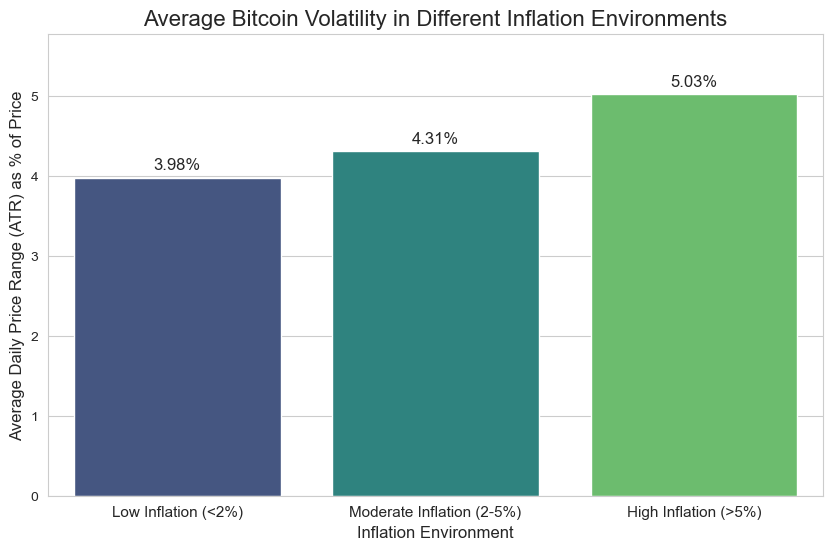

In [7]:
# Define the edges for our bins. For example, <2% is Low, 2-5% is Moderate, >5% is High.
bin_edges = [-np.inf, 2, 5, np.inf]
bin_labels = ['Low Inflation (<2%)', 'Moderate Inflation (2-5%)', 'High Inflation (>5%)']


# Create a new column in the DataFrame with these categories
final_df['Inflation_Category'] = pd.cut(final_df['Inflation_Rate'], bins=bin_edges, labels=bin_labels)


# Calculate Average Volatility for Each Category
# Group the data by our new categories and calculate the mean volatility for each so that
# we can summarize Bitcoin’s behavior across different inflation environments into a single, clear metric that we can compare.
avg_volatility = final_df.groupby('Inflation_Category')['BTC_Volatility'].mean().reset_index()


# Create the Bar Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


# Use seaborn's barplot to visualize the average volatility.
ax = sns.barplot(data=avg_volatility, x='Inflation_Category', y='BTC_Volatility', palette='viridis')


# This loop goes through each bar in the plot and adds its value as text.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', # Format the number to 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()), # Position of the text
                ha = 'center', va = 'center', # Center alignment
                xytext = (0, 9), # Offset the text slightly above the bar
                textcoords = 'offset points',
                fontsize=12)


# Titles and Labels
plt.title('Average Bitcoin Volatility in Different Inflation Environments', fontsize=16)
plt.xlabel('Inflation Environment', fontsize=12)
plt.ylabel('Average Daily Price Range (ATR) as % of Price', fontsize=12)
plt.xticks(fontsize=11)
ax.set_ylim(0, max(avg_volatility['BTC_Volatility']) * 1.15)


# Display the Plot
plt.show()




The results show a clear positive correlation. During periods of Low Inflation, Bitcoin's average daily price range was 3.99%. This volatility increased to 4.33% in Moderate Inflation environments and peaked at 5.00% during periods of High Inflation. This trend suggests that, contrary to the idea of it being a stable haven, Bitcoin's price becomes progressively less stable and more volatile as inflationary pressures increase.

To directly test the "Digital Gold" claim, we then expand this analysis with a comparative bar chart. This second visualization places Bitcoin's average volatility side-by-side with that of Gold—the benchmark traditional hedge against inflation—allowing for a direct comparison of their stability under different economic pressures, allowing for a direct comparison of their stability under different economic pressures.

/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64511/743498593.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_comp_volatility = final_df.groupby('Inflation_Category')[['BTC_Volatility', 'Gold_Volatility']].mean().reset_index()


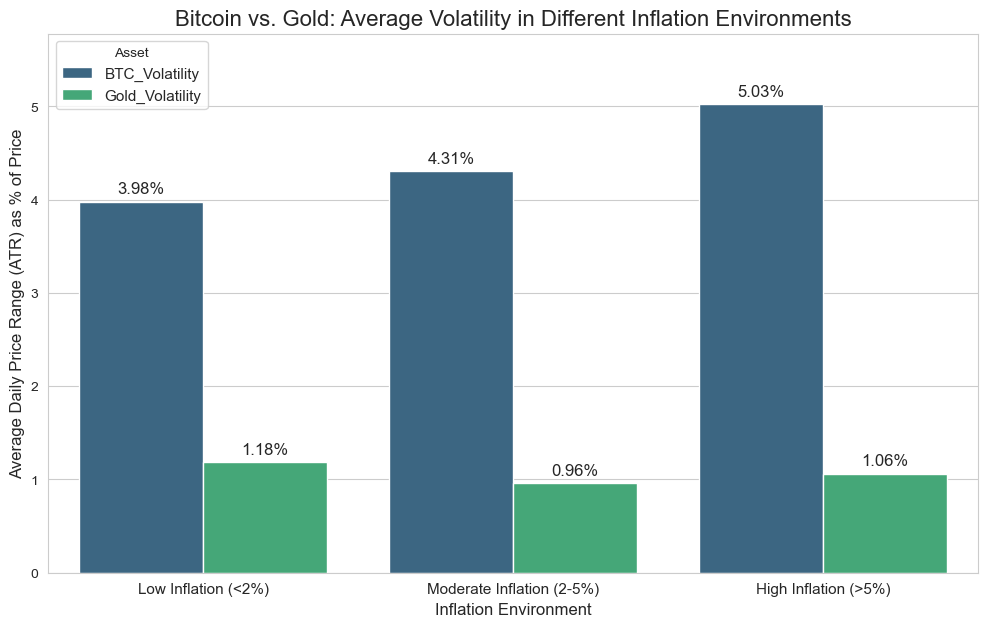

In [8]:
# Define the edges for our bins (if not already done). 
# This ensures the 'Inflation_Category' column exists in your final_df
if 'Inflation_Category' not in final_df.columns:
    bin_edges = [-np.inf, 2, 5, np.inf]
    bin_labels = ['Low Inflation (<2%)', 'Moderate Inflation (2-5%)', 'High Inflation (>5%)']
    final_df['Inflation_Category'] = pd.cut(final_df['Inflation_Rate'], bins=bin_edges, labels=bin_labels)



# Calculate Average Volatility for Each Category
# Group by the inflation categories and calculate the mean for both volatility columns
avg_comp_volatility = final_df.groupby('Inflation_Category')[['BTC_Volatility', 'Gold_Volatility']].mean().reset_index()



# We transform the data from a "wide" format to a "long" format, which is ideal for seaborn's hue functionality.
plot_data = pd.melt(avg_comp_volatility, id_vars='Inflation_Category',
                    value_vars=['BTC_Volatility', 'Gold_Volatility'],
                    var_name='Asset', value_name='Average Volatility')


# Create the Comparative Bar Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")


# Use the 'hue' parameter to create side-by-side bars for each asset
ax = sns.barplot(data=plot_data, x='Inflation_Category', y='Average Volatility', hue='Asset', palette='viridis')



# This loop goes through each bar in the plot and adds its value as text.
for p in ax.patches:
    # Add a condition to skip any bars with zero height
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}%', # Format the number to 2 decimal places
                    (p.get_x() + p.get_width() / 2., p.get_height()), # Position of the text
                    ha = 'center', va = 'center', # Center alignment
                    xytext = (0, 9), # Offset the text slightly above the bar
                    textcoords = 'offset points',
                    fontsize=12)



# Titles and Labels
plt.title('Bitcoin vs. Gold: Average Volatility in Different Inflation Environments', fontsize=16)
plt.xlabel('Inflation Environment', fontsize=12)
plt.ylabel('Average Daily Price Range (ATR) as % of Price', fontsize=12)
plt.xticks(fontsize=11)
plt.legend(title='Asset', fontsize=11)
ax.set_ylim(0, max(avg_volatility['BTC_Volatility']) * 1.15)



# Display the Plot
plt.show()




The results reveal a stark contrast in how Bitcoin and Gold behave under different inflationary pressures. During periods of Low Inflation (<2%), Bitcoin's average daily volatility was 3.98%, already substantially higher than Gold's 1.18%.

As inflation increased, this divergence became more pronounced. In High Inflation (>5%) environments, Bitcoin's volatility rose to 5.03%, while Gold's volatility remained low and stable at 1.06%.

This trend demonstrates that while Gold maintains its characteristic stability as a traditional hedge, Bitcoin becomes progressively less stable as inflationary pressures increase. The data challenges the "Digital Gold" narrative by showing that Bitcoin's behavior is the opposite of the stability exhibited by its physical counterpart in the environments where a safe haven is needed most.

**So, Does Bitcoin's volatility change during periods of high vs. low inflation?**

Bitcoin's volatility does **NOT** remain stable but instead shows a distinct positive correlation with inflation. Rather than acting as a stabilizing force, the data reveals that Bitcoin becomes progressively more chaotic and unpredictable as inflationary pressures rise. This behavior is in stark contrast to that of Gold, which maintained low volatility across all environments. Ultimately, the findings suggest that during the very times an investor might seek a stable safe haven from inflation, Bitcoin's own price instability intensifies, challenging its effectiveness in that role.

### Bitcoin vs. Market Crashes

A primary argument for Bitcoin is its potential to serve as a 'safe haven'—an asset expected to retain or even increase its value during a stock market downturn. This analysis directly investigates this claim by visually comparing Bitcoin's performance against the S&P 500 during periods of significant market stress. We begin with a long-term view of their cumulative returns to establish context, before zooming in on two critical case studies: the acute, rapid panic of the March 2020 COVID-19 crash and the sustained pressure of the 2022 bear market.

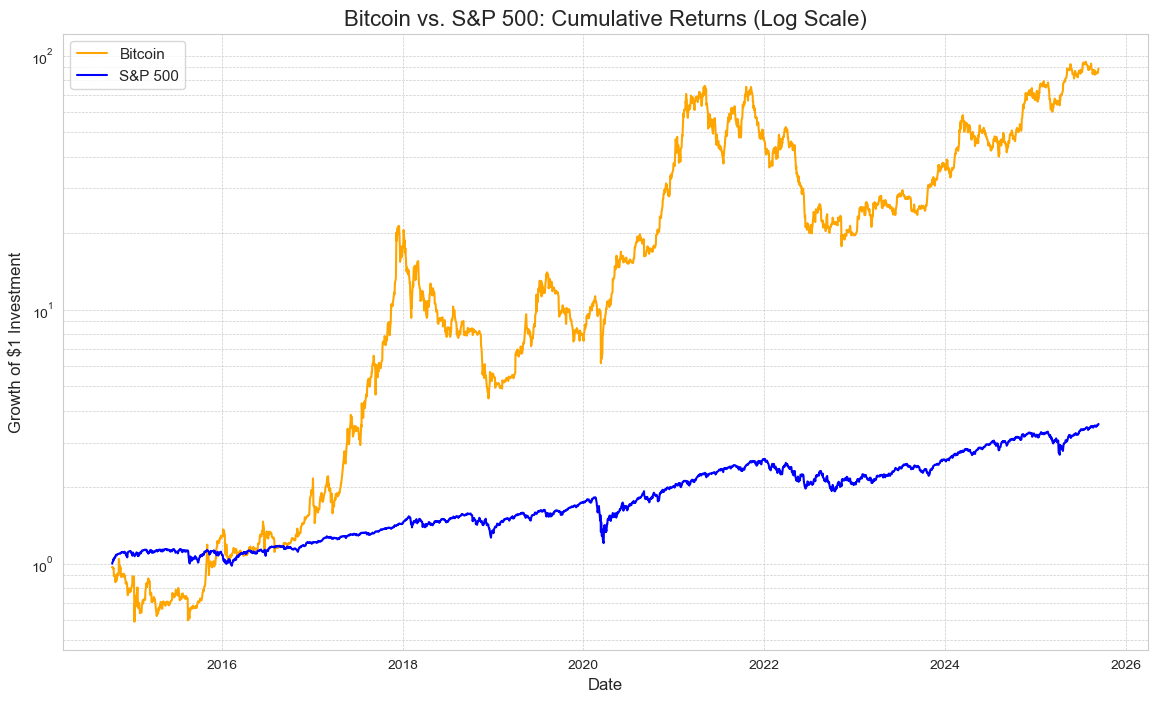

In [9]:
# Set the plot style for aesthetics
sns.set_style("whitegrid")


# Create a figure and axes to control the plot size
plt.figure(figsize=(14, 8))


# Calculate the cumulative returns for both assets.
# This shows the growth of an initial $1 investment.
final_df['BTC_Cumulative_Return'] = (1 + final_df['BTC_Return']).cumprod()
final_df['SP500_Cumulative_Return'] = (1 + final_df['SP500_Return']).cumprod()


# Plot both series on the same axes
plt.plot(final_df.index, final_df['BTC_Cumulative_Return'], label='Bitcoin', color='orange')
plt.plot(final_df.index, final_df['SP500_Cumulative_Return'], label='S&P 500', color='blue')


# Add Titles, Labels, and Formatting 
plt.title('Bitcoin vs. S&P 500: Cumulative Returns (Log Scale)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth of $1 Investment', fontsize=12)


# Use a logarithmic y-axis to fairly compare assets with vastly different growth rates
plt.yscale('log')

plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


# Display the plot
plt.show()



From a broad, long-term perspective, the chart reveals two primary characteristics. The most striking is Bitcoin's massive outperformance over the S&P 500, showing a vastly greater growth in value over the entire period.

However, this outperformance was accompanied by significantly higher volatility. This is visually evident in the much sharper peaks and deeper drawdowns of the Bitcoin line compared to the relatively smoother growth of the stock market. A general inspection also suggests a tendency for the two assets to move in the same general direction, indicating that broad market upturns and downturns appear to affect both.

Let us zoom into the COVID-19 Crash from Feb-May 2020:

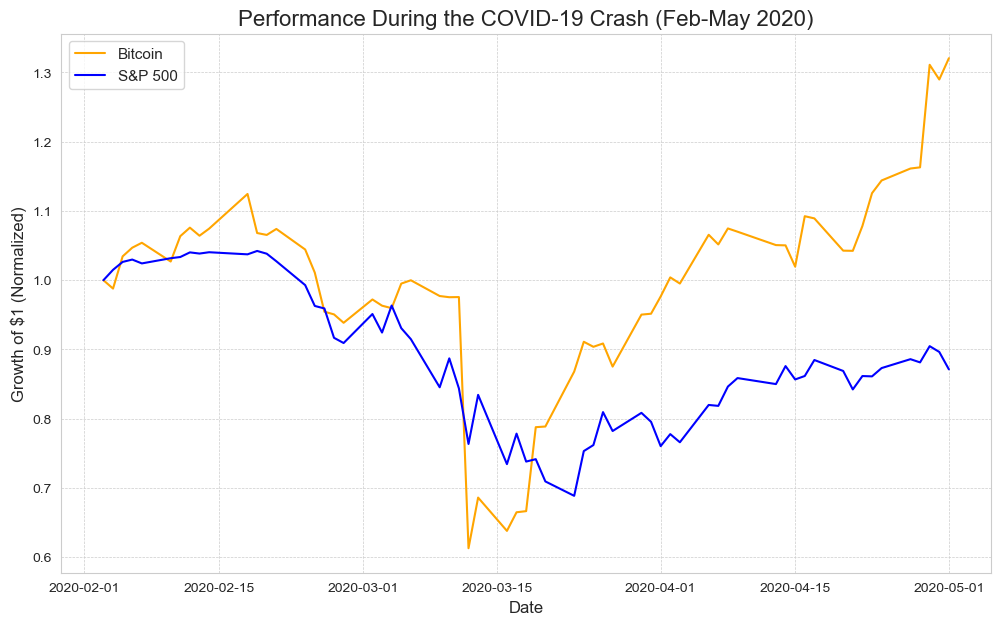

In [10]:
# Define the Date Range for the Crash 
start_date = '2020-02-01'
end_date = '2020-05-01'


# Filter the DataFrame to this Period 
crash_df_2020 = final_df[start_date:end_date]


# Re-normalize the Cumulative Returns 
# This resets the start of the period to 1 (or 100%) to show performance
# ONLY during this specific window.
btc_norm = crash_df_2020['BTC_Cumulative_Return'] / crash_df_2020['BTC_Cumulative_Return'].iloc[0]
sp500_norm = crash_df_2020['SP500_Cumulative_Return'] / crash_df_2020['SP500_Cumulative_Return'].iloc[0]


# Create the Plot 
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(btc_norm.index, btc_norm, label='Bitcoin', color='orange')
plt.plot(sp500_norm.index, sp500_norm, label='S&P 500', color='blue')



# Add Titles and Labels     
plt.title('Performance During the COVID-19 Crash (Feb-May 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth of $1 (Normalized)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


# Display the plot
plt.show()




Bitcoin did not function as a traditional "safe haven" during the COVID-19 crash. Both Bitcoin and the S&P 500 experienced sharp drawdowns in March 2020, with Bitcoin initially falling even harder. However, Bitcoin’s recovery was much stronger, ultimately outperforming the S&P 500 by May. This indicates that while Bitcoin does not shield investors from immediate market turmoil, it can act as a high-risk, high-reward asset that rebounds more aggressively.

Let us zoom into the 2022 Bear Market:

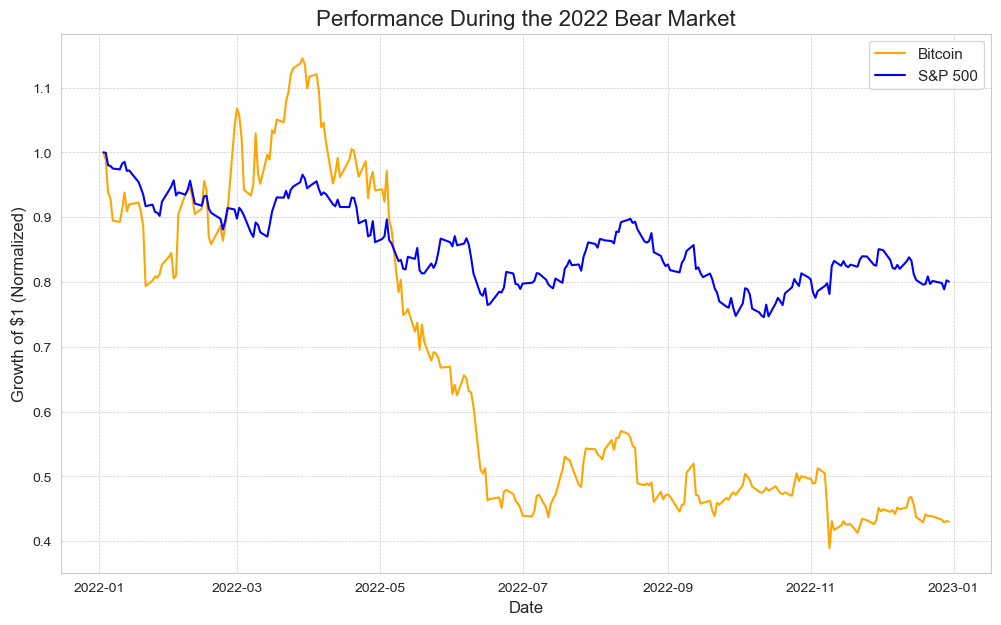

In [11]:
# Define the Date Range for the Bear Market 
start_date = '2022-01-01'
end_date = '2022-12-31'


# Filter the DataFrame to this Period
crash_df_2022 = final_df[start_date:end_date]


# Re-normalize the Cumulative Returns
btc_norm_2022 = crash_df_2022['BTC_Cumulative_Return'] / crash_df_2022['BTC_Cumulative_Return'].iloc[0]
sp500_norm_2022 = crash_df_2022['SP500_Cumulative_Return'] / crash_df_2022['SP500_Cumulative_Return'].iloc[0]


# Create the Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

plt.plot(btc_norm_2022.index, btc_norm_2022, label='Bitcoin', color='orange')
plt.plot(sp500_norm_2022.index, sp500_norm_2022, label='S&P 500', color='blue')


# Add Titles and Labels 
plt.title('Performance During the 2022 Bear Market', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth of $1 (Normalized)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


# Display the plot
plt.show()




Bitcoin did not behave like a "safe haven" during the 2022 bear market. While the S&P 500 declined steadily but moderately throughout the year, Bitcoin suffered a far steeper and more prolonged drop, losing more than half its value. Unlike the COVID-19 crash of 2020—where Bitcoin rebounded strongly after its initial fall—this time it failed to recover meaningfully and instead remained depressed. This performance suggests that Bitcoin amplifies downside risk during prolonged market stress rather than preserving value.

**So, During major stock market crashes, does Bitcoin act as a 'safe haven' by holding its value, or does it crash even harder?**

The evidence across both case studies suggests that Bitcoin does not act as a traditional "safe haven" during major stock market crashes. In the short-lived COVID-19 panic of March 2020, Bitcoin initially plunged even harder than equities but then staged a rapid and powerful rebound, ultimately outperforming the S&P 500. In contrast, during the prolonged 2022 bear market, Bitcoin suffered a far steeper and more sustained decline, losing over half its value while the S&P 500 experienced a more moderate drawdown.  

This mixed behavior suggests that Bitcoin is not a protective asset during market stress, but rather one that behaves with amplified sensitivity to market conditions. In other words, it tends to drop when overall risk sentiment turns negative, often by a larger amount than traditional stocks. Its eventual performance depends on the type of downturn: if the shock is short-lived, Bitcoin can bounce back quickly as speculative interest returns; but if the downturn drags on, it struggles to recover and remains suppressed.

Thus, while Bitcoin can deliver outsized gains in recovery phases, it does not consistently protect value during downturns. Its volatility and correlation with risk assets mean it amplifies exposure rather than insulating portfolios, challenging the narrative of Bitcoin as a reliable "safe haven."

### A Test of Resilience: BTC in Times of Fear

To test Bitcoin's ability to be a hedge, we turn to the VIX, often called the “fear index.” The VIX measures expected market volatility by tracking option prices (contracts that let investors bet on or protect against future price moves) on the S&P 500, making it one of the most widely used gauges of investor anxiety and uncertainty.  

In this section, we focus on periods when the VIX is elevated—moments of heightened fear—and compare the performance of Bitcoin, gold, and the S&P 500. To visualize this, we construct cumulative return indices (growth of \$1) and overlay shaded regions during high-VIX episodes. This approach makes it clear whether Bitcoin aligns more closely with traditional hedges (like gold) or with risk assets (like equities) in times of fear.  

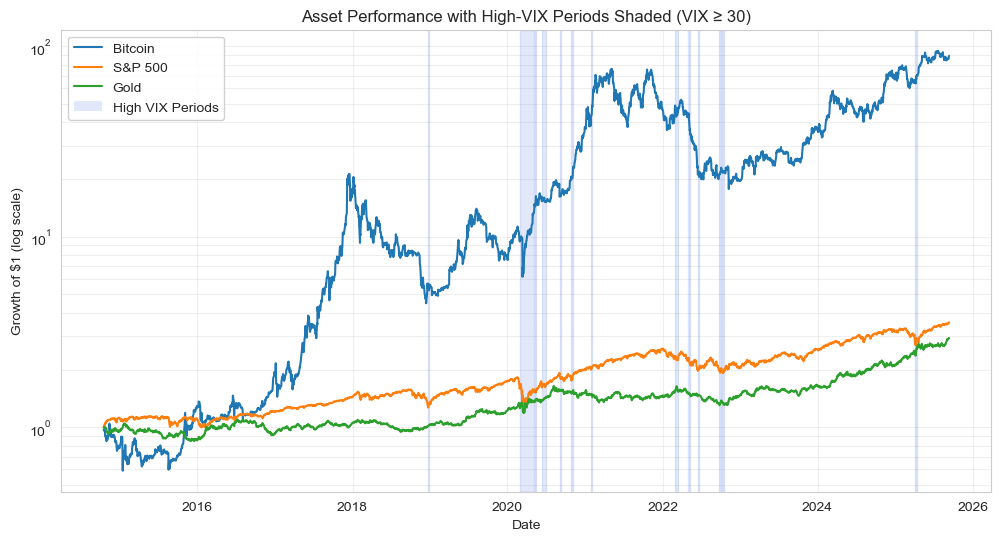

In [12]:
# Build normalized $1 indices from your return series
norm = pd.DataFrame(index=final_df.index)
for col, out in [('BTC_Return','BTC'), ('SP500_Return','SP500'), ('Gold_Return','GOLD')]:
    norm[out] = (1 + final_df[col]).fillna(0).cumprod()  # growth of $1


# Define 'fear episodes' from VIX 
# Choose: absolute threshold (common: 30) or regime threshold (e.g., top quartile)
USE_ABSOLUTE = True
if USE_ABSOLUTE:
    vix_thresh = 30.0
else:
    vix_thresh = final_df['VIX'].quantile(0.75)

high_vix = final_df['VIX'] >= vix_thresh


# Group consecutive True segments into contiguous episodes (for shading)
grp_id = (high_vix.ne(high_vix.shift())).cumsum()  # label each run of T/F
episodes = []


# Group the boolean Series; each block is a contiguous run
for gid, block in high_vix.groupby(grp_id):
    if not block.iloc[0]:        # this run is a 'False' block, skip
        continue
    start = block.index[0]
    end   = block.index[-1]
    # filter out very short blips if desired
    if (end - start).days >= 3:
        episodes.append((start, end))


# Plot normalized indices with shaded fear bands
fig, ax = plt.subplots(figsize=(12,6))
line_btc, = ax.plot(norm.index, norm['BTC'],  label='Bitcoin', linewidth=1.5)
line_sp , = ax.plot(norm.index, norm['SP500'],label='S&P 500', linewidth=1.5)
line_gold,= ax.plot(norm.index, norm['GOLD'], label='Gold', linewidth=1.5)


# Shaded fear periods (use explicit color)
shade_color = 'royalblue'
for (start, end) in episodes:
    ax.axvspan(start, end, alpha=0.15, color=shade_color)


# Log scale, labels, grid 
ax.set_yscale("log")
ax.set_title("Asset Performance with High-VIX Periods Shaded (VIX ≥ 30)")
ax.set_ylabel("Growth of $1 (log scale)")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3, which="both")


# Legend with proxy patch 
fear_patch = mpatches.Patch(facecolor=shade_color, alpha=0.15,
                            edgecolor='none', label='High VIX Periods')
ax.legend(handles=[line_btc, line_sp, line_gold, fear_patch],
          loc='upper left', framealpha=0.9)


# Display the visualization
plt.show()



The shaded regions highlight periods when the VIX (the “fear index”) was elevated, signaling heightened investor anxiety. During these spikes in market-wide fear, Bitcoin does not behave like a traditional safe haven. Instead, its performance more closely resembles that of stocks, with sharp drawdowns that often coincide with stress in the S&P 500.  

Gold, by contrast, remains far more stable during these same episodes, occasionally rising or at least holding its value, which is consistent with its reputation as a hedge. Bitcoin’s tendency to fall alongside equities—and at times by an even greater magnitude—suggests that it functions more as a high-risk, speculative asset rather than a defensive one.  

**So, how does Bitcoin’s performance change during spikes in market-wide fear and uncertainty, and does it behave more like gold (a hedge) or the S&P 500 (a risk asset)?**

Bitcoin’s performance during spikes in market-wide fear and uncertainty does not resemble that of a hedge. Instead, it behaves more like a risk asset, similar to the S&P 500. When the VIX signals elevated fear, Bitcoin tends to experience sharp declines that align closely with stress in equities. Gold, on the other hand, often maintains stability or even rises during these same periods, reinforcing its role as a hedge.

In short, when fear dominates markets, Bitcoin aligns with risk assets like the S&P 500 rather than hedges like gold. Its long-term potential for growth is significant, but in the short term it does not provide the protection investors typically seek during periods of elevated uncertainty.  

### Monetary Policy vs. BTC

Another important question for Bitcoin’s role as “Digital Gold” is how it reacts when U.S. interest rates change. Interest rates here are measured by the Effective Federal Funds Rate (DFF), which is the short-term rate banks charge each other for overnight loans. The Federal Reserve adjusts this rate as part of its monetary policy: raising it usually means borrowing money becomes more expensive (tightening financial conditions), while lowering it makes borrowing cheaper (loosening financial conditions).  

To answer this, we build a bar chart of average weekly returns under two regimes: when interest rates are above their median (high-rate) and when they are below (low-rate). For each regime, we calculate the average return of Bitcoin, gold, and the S&P 500. If Bitcoin behaves like gold, its returns should stay steady across regimes; if it behaves like a risk asset, its returns should drop during high-rate periods.  

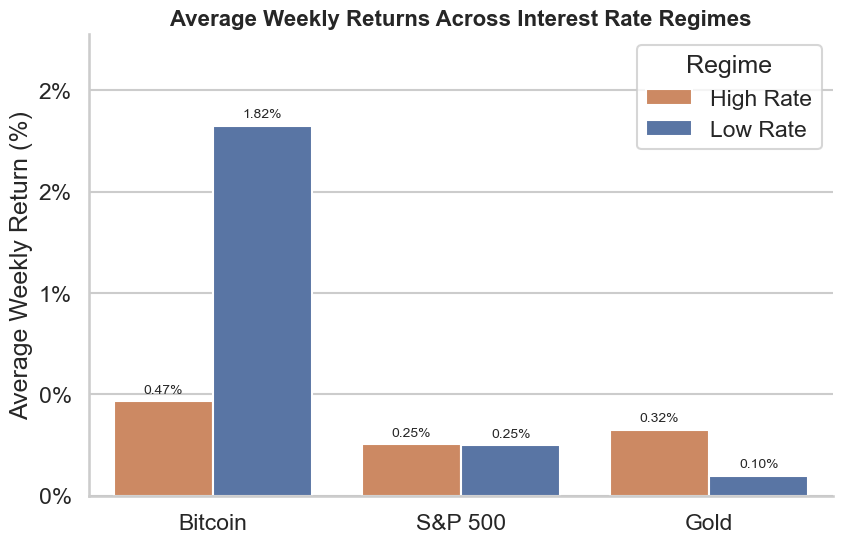

In [13]:
# Build weekly returns + DFF, then create High/Low rate regimes 
# Assumes final_df has columns: BTC_Return, SP500_Return, Gold_Return, DFF
cols_ret = ['BTC_Return','SP500_Return','Gold_Return']


# Weekly compounded returns (not sums)
weekly_ret = (1 + final_df[cols_ret]).resample('W-FRI').prod() - 1
weekly_dff = final_df['DFF'].resample('W-FRI').last()
weekly = weekly_ret.join(weekly_dff).dropna()
median_dff = weekly['DFF'].median()
weekly['Regime'] = np.where(weekly['DFF'] > median_dff, 'High Rate', 'Low Rate')


# Compute table of mean returns by regime and reshape for plotting 
mean_returns = weekly.groupby('Regime')[cols_ret].mean()

melted_means = (
    mean_returns
    .T
    .reset_index()
    .melt(id_vars='index', var_name='Regime', value_name='Mean Return')
    .rename(columns={'index':'Asset'})
)


# Rename assets for better readability
name_map = {'BTC_Return':'Bitcoin', 'SP500_Return':'S&P 500', 'Gold_Return':'Gold'}
melted_means['Asset'] = melted_means['Asset'].map(name_map)


# Plot: Average Weekly Returns Across Interest Rate Regimes
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(9.6,6))
palette = {'Low Rate':'#4C72B0', 'High Rate':'#DD8452'}
sns.barplot(data=melted_means, x='Asset', y='Mean Return', hue='Regime', palette=palette, ax=ax)


# Value labels on bars
for p in ax.patches:
    h = p.get_height()
    if np.isfinite(h) and p.get_height() > 0:
        ax.annotate(f"{h:.2%}",
                    (p.get_x() + p.get_width()/2.0, h),
                    ha='center', va='bottom', fontsize=10,
                    xytext=(0, 4), textcoords='offset points')


# Aesthetics
ax.axhline(0, color='gray', linewidth=1, alpha=0.7)
ax.set_title("Average Weekly Returns Across Interest Rate Regimes", fontsize=16, weight='bold')
ax.set_ylabel("Average Weekly Return (%)")
ax.set_xlabel("")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
ax.legend(title="Regime")
ymax = melted_means['Mean Return'].max()
ax.set_ylim(0, ymax * 1.25)


# Display the visualization
sns.despine()
plt.show()


This chart shows how Bitcoin, gold, and the S&P 500 perform when U.S. interest rates are high compared to when they are low. Interest rates here are measured by the Federal Funds Rate (DFF), which is the short-term rate set by the Federal Reserve to guide borrowing costs in the economy.  

What stands out most is that Bitcoin earns much higher average returns when interest rates are low, but its returns shrink when interest rates rise. In other words, Bitcoin seems to thrive when money is cheap and liquidity is plentiful, but it struggles once financial conditions tighten. Gold, on the other hand, remains more stable across both environments, showing the kind of steady behavior often expected from a hedge. The S&P 500, which represents the stock market, stays roughly the same in both high-rate and low-rate regimes, serving as a useful baseline for comparison.  

Taken together, this suggests that Bitcoin does not act like a hedge in the way gold does. Instead, it behaves more like a risk asset: strong gains when conditions are easy, but weaker performance when policy tightens. Rather than offering protection, Bitcoin’s fortunes seem tied to the broader cycle of risk and liquidity in the economy.  

**So, Does Bitcoin behave like a hedge or a risk asset when U.S. interest rates (DFF) rise or fall, and how does its response compare to gold and the S&P 500?**

Bitcoin behaves more like a risk asset rather than a hedge when U.S. interest rates rise or fall. Its performance is highly sensitive to monetary conditions: it thrives during periods of low rates when money is cheap and liquidity is abundant, but weakens when rates rise and financial conditions tighten. Gold, in contrast, remains stable across both high- and low-rate environments, reflecting its role as a hedge.

Taken together, Bitcoin’s dependency on liquidity makes it align more with equities than with a protective hedge like gold.

## Altogether:

These results tell a consistent story: Bitcoin behaves much more like a **risk asset** than a hedge. Its fortunes rise when liquidity is abundant and risk appetite is strong, but it struggles under inflation, monetary tightening, or market fear. Gold continues to serve as the safer hedge, while Bitcoin acts more like a speculative asset whose performance is tied to broader cycles of risk and liquidity.  

## External References  

1. **Inflation and Bitcoin**  
   - [Federal Reserve CPI data (CPIAUCSL)](https://fred.stlouisfed.org/series/CPIAUCSL)  
   - [Academic study on Bitcoin and inflation hedging](https://www.sciencedirect.com/science/article/pii/S1544612321003810)  

2. **Bitcoin in Market Crashes**  
   - [S&P 500 historical data](https://finance.yahoo.com/quote/GSPC/)  
   - [Analysis of Bitcoin’s performance in the COVID-19 crash](https://www.sciencedirect.com/science/article/pii/S1059056025006756)  

3. **Bitcoin vs. Market Fear (VIX)**  
   - [CBOE Volatility Index (VIX)](https://finance.yahoo.com/quote/^VIX/)  
   - [Bitcoin and investor sentiment research](https://www.sciencedirect.com/science/article/pii/S1544612319309274)  

4. **Interest Rates (DFF) and Bitcoin**  
   - [Effective Federal Funds Rate (DFF)](https://fred.stlouisfed.org/series/DFF)  
   - [Study on monetary policy and cryptocurrency](https://www.sciencedirect.com/science/article/abs/pii/S0261560623000815)  

5. **Gold as a Hedge (Comparison Benchmark)**  
   - [Gold Futures data](https://finance.yahoo.com/quote/GC=F/)  
   - [Classic paper on gold as a hedge and safe haven](https://www.sciencedirect.com/science/article/abs/pii/S154461231100002X)  
